In [1]:
import cv2 as cv
import os
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
def get_random_file(root_folder):
    all_files = []

    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            all_files.append(file_path)

    if not all_files:
        print("No files found in the specified folder.")
        return None

    random_file = random.choice(all_files)
    return random_file

Images/Iris System/MMU-Iris-Database/38/right/tickr5.bmp
pupil_center=(174, 128),pupil_radius=28
radius_iris=54


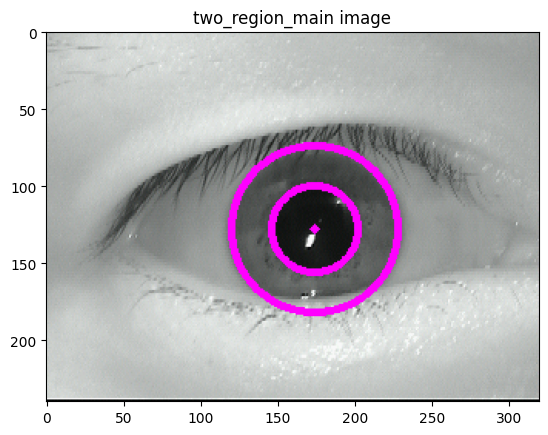

In [131]:
folder_path = os.path.join('Images','Iris System')
exclude_folder_name = ['Normalized_Images']

random_file_path = get_random_file(folder_path)
main_image = cv.imread(random_file_path)
if main_image is None:
    raise Exception(f'Error opening image!: {random_file_path}')

print(random_file_path)

gray_image = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
rows,cols= gray_image.shape

blurred_image = cv.medianBlur(gray_image, 5)
circles = cv.HoughCircles(blurred_image, cv.HOUGH_GRADIENT, dp=1, minDist=rows/8,
                           param1=100, param2=30,
                           minRadius=20, maxRadius=50)
if circles is None:
    raise Exception("No circles detected. Error")

if(len(circles)>1):
    raise Exception("Multiple circles detected. Error")

if(len(circles)<1):
    raise Exception("No circles detected. Error")

circles = np.uint16(np.around(circles))

pupil_center = (circles[0,0,0], circles[0,0,1])
# circle center
cv.circle(main_image, pupil_center, 1, (255, 0, 255), 3)
# circle outline
pupil_radius = circles[0,0,2]
cv.circle(main_image, pupil_center, pupil_radius, (255, 0, 255), 3)

print(f"pupil_center={pupil_center},pupil_radius={pupil_radius}")

r=pupil_radius
min_r=r+10
max_r=int(2.4*r)
xc,yc=pupil_center

arr=np.array(blurred_image).reshape(rows,cols).astype(int)

radius_range = range(pupil_radius+10,int(pupil_radius*2.4))

intensity_sum = np.zeros(len(radius_range))

for i, radius in enumerate(radius_range):
    for theta in range(0, 360):  # Iterate over all angles
        # Convert polar coordinates to Cartesian coordinates
        x = int(xc + radius * np.cos(np.deg2rad(theta)))
        y = int(yc - radius * np.sin(np.deg2rad(theta)))  # Negative sign for y-component

        # Ensure the coordinates are within the image bounds
        if 0 <= x < arr.shape[1] and 0 <= y < arr.shape[0]:
            intensity_sum[i] += arr[y, x]

Rr = None
max_val = float('-inf')
for i in range(2, len(intensity_sum) - 2):
    val = intensity_sum[i + 2] + intensity_sum[i + 1] - intensity_sum[i - 1] - intensity_sum[i - 2]
    if val > max_val:
        max_val = val
        Rr = i

iris_radius=pupil_radius+10+Rr

print(f"radius_iris={iris_radius}")

cv.circle(main_image, pupil_center, int(iris_radius), (255, 0, 255), 3)

plt.title("two_region_main image")
plt.imshow(main_image)